<a href="https://colab.research.google.com/github/arzuantor/Linear-Regression/blob/main/leaner_rigression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Libraries



In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#Load Data

In [320]:
df=pd.read_csv('/content/data (1) - data (1).csv')

In [321]:
df.head(2)

,x,y
0,48.955889,60.723602
1,44.687196,82.892504


#Data Analysis

Null value check


In [322]:
df.isna().sum()

,0
x,0
y,0


duplicate value check

In [323]:
df.duplicated().sum()

np.int64(0)

info check


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       99 non-null     float64
 1   y       99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


#visulaization

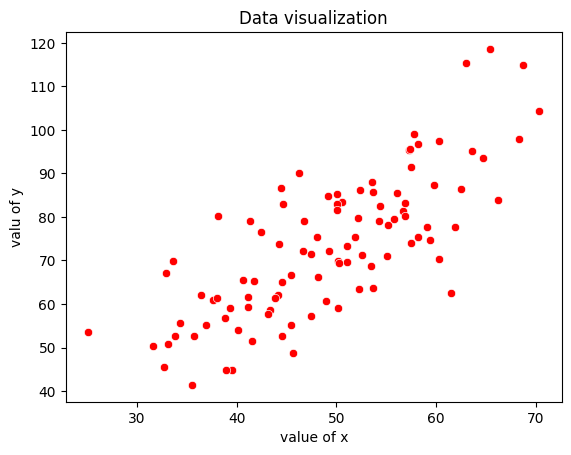

In [325]:
sns.scatterplot(x=df.x, y=df.y, color="r")
plt.xlabel("value of x")
plt.ylabel("valu of y")
plt.title("Data visualization")
plt.show()

#check data correlation

In [326]:
df.corr()

,x,y
x,1.000000,0.766264
y,0.766264,1.000000


<Axes: >

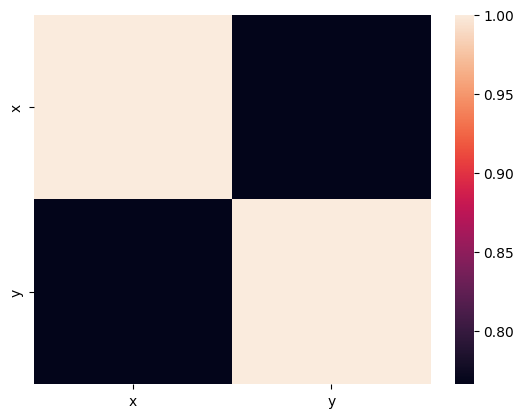

In [327]:
sns.heatmap(df.corr())

#Data Distubution

In [328]:
x=df[['x']]
y=df[['y']]

In [329]:
x.head(2)

,x
0,48.955889
1,44.687196


In [330]:
y.head(2)

,y
0,60.723602
1,82.892504


In [331]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [332]:
xtrain.head()

,x
49,38.119824
70,53.660932
68,35.678094
15,55.142188
39,44.555608


In [333]:
ytrain.head()

,y
49,80.166275
70,63.642399
68,52.721735
15,78.211518
39,52.682983


#model bulding




In [334]:
lr=LinearRegression()

#train the model

In [335]:
model=lr.fit(xtrain,ytrain)

In [336]:
model

LinearRegression()

#predict genaration

In [339]:
model.predict([[38]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[60.45497046]])

In [340]:
y_pred=model.predict(xtest)

In [341]:
y_pred

array([[ 75.29719392],
       [ 66.95946006],
       [ 74.20168945],
       [ 72.81387336],
       [ 72.86868674],
       [ 80.36896248],
       [ 62.36035101],
       [ 67.63498356],
       [ 80.45372692],
       [ 73.85449589],
       [ 65.88097358],
       [ 59.14640789],
       [ 55.39672654],
       [ 91.78390943],
       [ 53.93498047],
       [ 61.45397362],
       [ 64.82813598],
       [ 85.12188219],
       [ 60.46168253],
       [100.01561951]])

In [342]:
ytest

,y
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958
84,79.120646
64,44.862491
42,61.424710
10,82.478847
0,60.723602


#Draw Best Fit Line

Text(0, 0.5, 'valu of y')

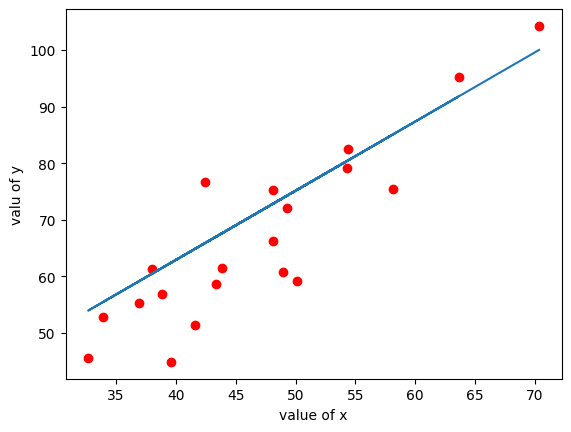

In [343]:
plt.scatter(xtest, ytest, color="r")
plt.plot(xtest, model.predict(xtest))
plt.xlabel("value of x")
plt.ylabel("valu of y")


add prediction as new cols

In [344]:
df["pred"]=model.predict(df[["x"]])

In [345]:
df.head()

,x,y,pred
0,48.955889,60.723602,73.854496
1,44.687196,82.892504,68.633701
2,60.297327,97.379897,87.725565
3,45.618644,48.847153,69.772901
4,38.816818,56.877213,61.453974


In [346]:
df["error"]=df["y"]-df['pred']

In [347]:
df.head()

,x,y,pred,error
0,48.955889,60.723602,73.854496,-13.130893
1,44.687196,82.892504,68.633701,14.258803
2,60.297327,97.379897,87.725565,9.654332
3,45.618644,48.847153,69.772901,-20.925748
4,38.816818,56.877213,61.453974,-4.576760
